<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 32: Residuals

Associated Textbook Sections: [15.5 - 15.6](https://inferentialthinking.com/chapters/15/5/Visual_Diagnostics.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-32:-Residuals" data-toc-modified-id="Lecture-32:-Residuals-1">Lecture 32: Residuals</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-1.3">Residuals</a></span><ul class="toc-item"><li><span><a href="#Residuals" data-toc-modified-id="Residuals-1.3.1">Residuals</a></span></li><li><span><a href="#Demo:-Residuals" data-toc-modified-id="Demo:-Residuals-1.3.2">Demo: Residuals</a></span></li></ul></li><li><span><a href="#Regression-Diagnostics" data-toc-modified-id="Regression-Diagnostics-1.4">Regression Diagnostics</a></span><ul class="toc-item"><li><span><a href="#Example:-Dugongs" data-toc-modified-id="Example:-Dugongs-1.4.1">Example: Dugongs</a></span></li><li><span><a href="#Demo:-Dugongs" data-toc-modified-id="Demo:-Dugongs-1.4.2">Demo: Dugongs</a></span></li><li><span><a href="#Residual-Plot" data-toc-modified-id="Residual-Plot-1.4.3">Residual Plot</a></span></li><li><span><a href="#Properties-of-residuals" data-toc-modified-id="Properties-of-residuals-1.4.4">Properties of residuals</a></span></li><li><span><a href="#Reflection" data-toc-modified-id="Reflection-1.4.5">Reflection</a></span></li></ul></li><li><span><a href="#A-Measure-of-Clustering" data-toc-modified-id="A-Measure-of-Clustering-1.5">A Measure of Clustering</a></span><ul class="toc-item"><li><span><a href="#Correlation,-Revisited" data-toc-modified-id="Correlation,-Revisited-1.5.1">Correlation, Revisited</a></span></li><li><span><a href="#SD-of-Fitted-Values" data-toc-modified-id="SD-of-Fitted-Values-1.5.2">SD of Fitted Values</a></span></li><li><span><a href="#Demo:-A-Measure-of-Clustering" data-toc-modified-id="Demo:-A-Measure-of-Clustering-1.5.3">Demo: A Measure of Clustering</a></span></li><li><span><a href="#Variance-of-Fitted-Values" data-toc-modified-id="Variance-of-Fitted-Values-1.5.4">Variance of Fitted Values</a></span></li><li><span><a href="#A-Variance-Decomposition" data-toc-modified-id="A-Variance-Decomposition-1.5.5">A Variance Decomposition</a></span></li><li><span><a href="#A-Variance-Decomposition---Continued" data-toc-modified-id="A-Variance-Decomposition---Continued-1.5.6">A Variance Decomposition - Continued</a></span></li><li><span><a href="#Residual-Average-and-SD" data-toc-modified-id="Residual-Average-and-SD-1.5.7">Residual Average and SD</a></span></li><li><span><a href="#Demo:-Average-of-Residuals" data-toc-modified-id="Demo:-Average-of-Residuals-1.5.8">Demo: Average of Residuals</a></span></li><li><span><a href="#Demo:-SD-of-the-Residuals" data-toc-modified-id="Demo:-SD-of-the-Residuals-1.5.9">Demo: SD of the Residuals</a></span></li><li><span><a href="#Example-1" data-toc-modified-id="Example-1-1.5.10">Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-1.5.11">Example 2</a></span></li></ul></li></ul></li></ul></div>

## Residuals

### Residuals

* Error in regression estimate
* One residual corresponding to each point (x, y)
* residual 
    * = observed y - regression estimate of y
    *  = observed y - height of regression line at x
    *  = vertical distance between the point and the best line


### Demo: Residuals

Calculate and visualize the residuals associated with linear regression estimates for `Median Income` values based on `College%` in the `district_demographics2016.csv` data. 

In [2]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [3]:
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [4]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


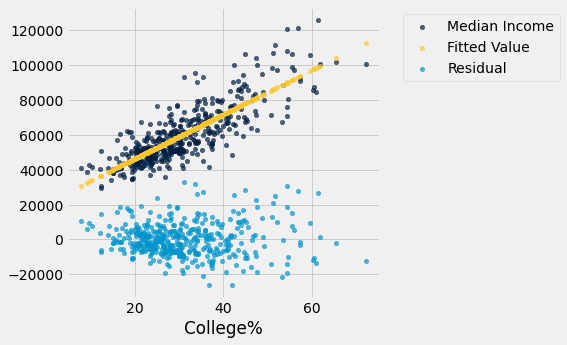

In [5]:
demographics.scatter('College%')

In [6]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

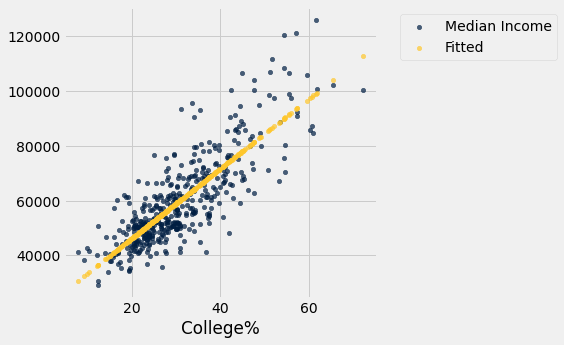

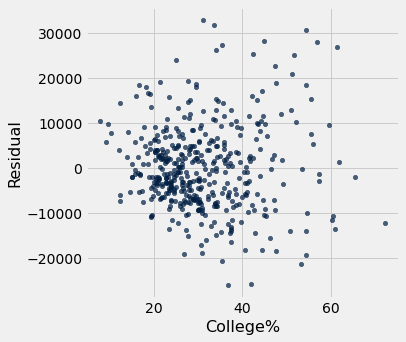

In [7]:
plot_residuals(demographics, 'College%', 'Median Income')

Additionally, visualize the residuals associated with the `galton.csv` data set when predicting `Child` values from `Midparent` values using linear regression.

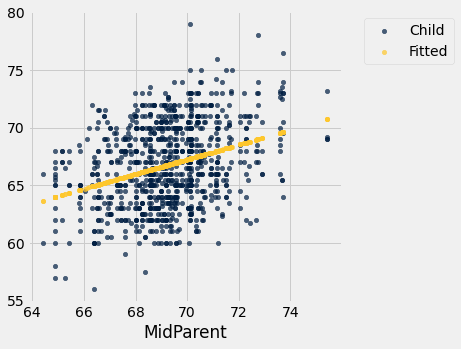

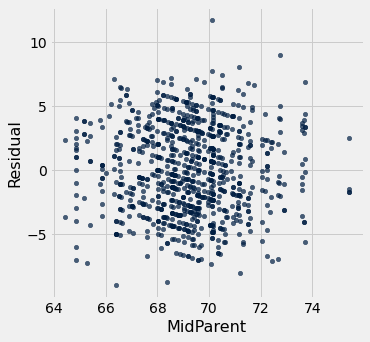

In [8]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

## Regression Diagnostics

### Example: Dugongs

<img src="img/lec32_dugong_OSU.jpeg" width=50%>

Image Source: [OSU Geospatial Ecology of Marine Megafauna Laboratory](https://blogs.oregonstate.edu/gemmlab/2021/09/27/let-me-introduce-you-to-dugongs/)

### Demo: Dugongs

Visualize the relationship between a dugong's length and age based on the `dugong.csv` dataset. Although the data is not linear, calculate the correlation coefficient.

In [9]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


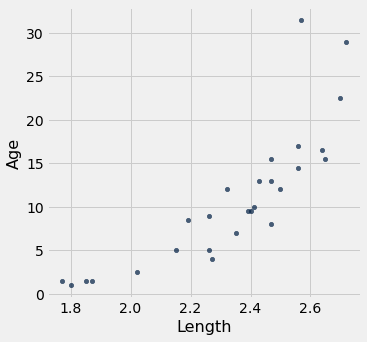

In [10]:
dugong.scatter('Length', 'Age')

In [11]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

Visualize the residuals associated with the linear regression prediction for a dugong's age based on it's height.

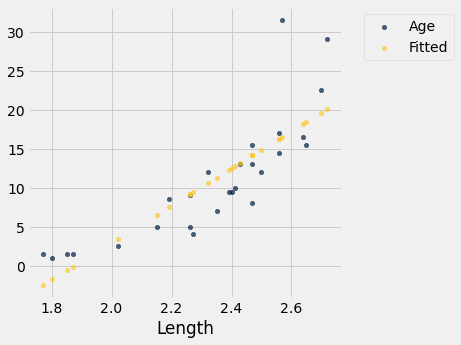

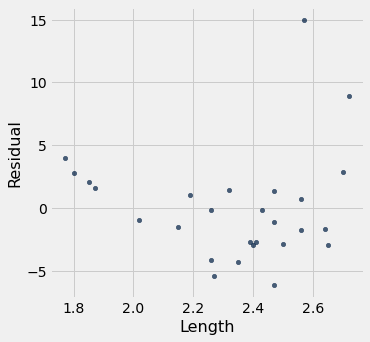

In [12]:
plot_residuals(dugong, 'Length', 'Age')

### Residual Plot

A scatter diagram of residuals
* Should look like an unassociated blob for linear relations
* But will show patterns for non-linear relations
* Used to check whether linear regression is appropriate
* Look for curves, trends, changes in spread, outliers, or any other patterns


### Properties of residuals

Residuals from a linear regression always have
* Zero mean (so rmse = SD of residuals)
* Zero correlation with $x$
* Zero correlation with the fitted values

### Reflection

How would we adjust our regression line ...

1. if the average residual were 10?
2. if the residuals were positively correlated with x?
3. if the residuals were above 0 in the middle and below 0 on the left and right?


## A Measure of Clustering

### Correlation, Revisited

* "The correlation coefficient measures how clustered the points are about a straight line."
* We can now quantify this statement.


### SD of Fitted Values

* $\frac{\text{SD of fitted values}}{\text{SD of } y} = |r|$
* $\text{SD of fitted values} = |r| \times \text{SD of } y$

### Demo: A Measure of Clustering

Use the datasets to observe the relationship between the standard deviation of the fitted values and the standard deviation of the $y$ values.

In [13]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

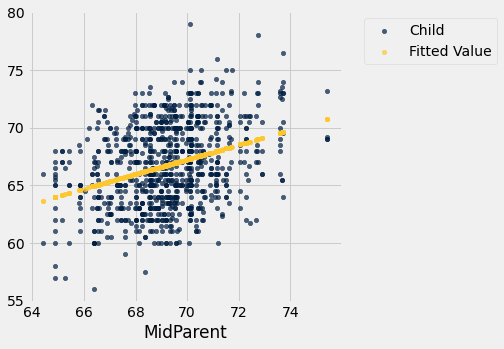

In [14]:
plot_fitted(heights, 'MidParent', 'Child')

In [15]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_observed_sd = np.std(heights.column('Child'))
print(child_predictions_sd)
print(child_observed_sd)

1.148145168378806
3.5773346010057634


In [16]:
child_predictions_sd / child_observed_sd

0.32094989606395957

In [17]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

In [18]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

In [19]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))
dugong_prediction_sd / dugong_observed_sd

0.8296474554905713

In [20]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


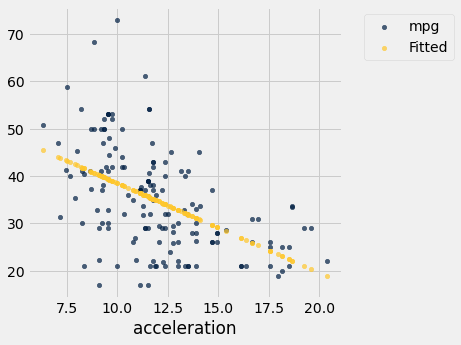

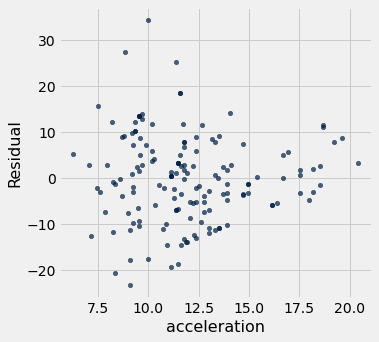

In [21]:
plot_residuals(hybrid, 'acceleration', 'mpg')

In [22]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [23]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

### Variance of Fitted Values

* Variance is the average of the squared deviations.
* Variance has good mathematical properties.
* $$\frac{\text{Variance of fitted values}}{\text{Variance of } y} = r^2$$

### A Variance Decomposition

* By definition $y = \text{fitted values} + \text{residuals}$
* It is tempting to believe that the incorrect statement $\text{SD of } y = \text{SD of fitted values} + \text{SD of residuals}$ ❌
* The correct statement is $$\text{Variance of } y = \text{Variance of fitted values} + \text{Variance of residuals}$$

### A Variance Decomposition - Continued

With $\text{Variance of } y = \text{Variance of fitted values} + \text{Variance of residuals}$ and $\frac{\text{Variance of fitted values}}{\text{Variance of } y} = r^2$, then $$\frac{\text{Variance of residuals}}{\text{Variance of } y} = 1 - r^2$$

### Residual Average and SD

* Average of residuals: 0
* $\text{SD of residuals} = \sqrt{1 - r^2} \times \text{SD of y}$

### Demo: Average of Residuals

Notice the following examples support the properties about the residuals expressed above.

In [24]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [25]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

In [26]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [27]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)


In [28]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

In [29]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0

### Demo: SD of the Residuals

No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

Observe this property in the datasets.

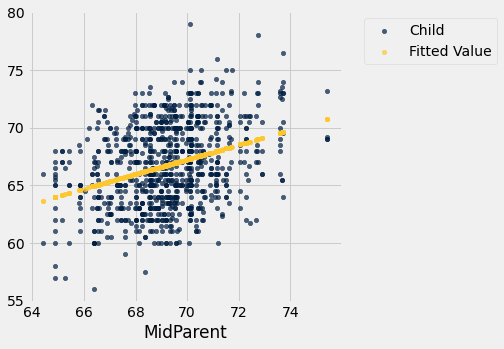

In [30]:
plot_fitted(heights, 'MidParent', 'Child')

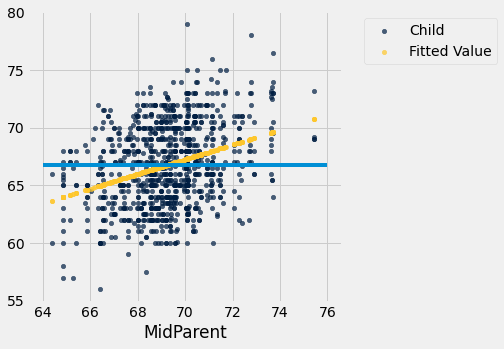

In [31]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

In [32]:
np.std(heights.column('Child')) ** 2

12.797322847553064

In [33]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2

11.47908551988147

In [34]:
np.std(heights.column('Fitted Value')) ** 2

1.3182373276715966

Notice the above 2 cells (variance of fitted values + variance of residuals) sum to variance of actual y-values.

In [35]:
np.std(dugong.column('Age')) ** 2

59.635802469135804

In [36]:
np.std(fitted_values(dugong, 'Length', 'Age')) ** 2

41.04821143693533

In [37]:
np.std(residuals(dugong, 'Length', 'Age')) ** 2

18.58759103220045

Notice the above 2 cells (variance of fitted values + variance of residuals) sum to variance of actual y-values.

In [38]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [39]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.388079916395342

In [45]:
np.std(residuals(heights, 'MidParent', 'Child'))

3.3880799163953426

Above and below we have two different ways to calculate the SD of the residuals.

In [40]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

9.43273683343029

In [41]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [42]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))

9.43273683343029

### Example 1

* Midterm: Average 70, SD 10
* Final: Average 60, SD 15
* r = 0.6
---
* When predicting the final exam score from the midterm, the SD of the residuals is ___.

In [48]:
SD_of_FinalExam_residuals = np.sqrt(1 - 0.6**2)*15
SD_of_FinalExam_residuals

12.0

### Example 2

* Midterm: Average 70, SD 10
* Final: Average 60, SD 15
* r = 0.6
---
* For at least 75% of the students, the regression estimate of final score based on midterm score will be correct to within ___ points.

In [49]:
SD_of_FinalExam_residuals*2

24.0

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>